# 🧠 Projet Data Science : Prétraitement d’images pour la classification

Ce projet vise à appliquer différentes techniques de **prétraitement d'images** afin d'améliorer la qualité des données avant l'entraînement d'un modèle de **classification d'images**.

Nous utiliserons ici le dataset **CIFAR-100** (images couleurs en 100 classes).

In [ ]:
# 📦 Importation des bibliothèques nécessaires
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import random

## 1. 📥 Chargement des données CIFAR-100

Le jeu de données CIFAR-100 (Canadian Institute For Advanced Research) est une extension significative du jeu de données CIFAR-100, composé de 60 000 images couleur de 32x32 pixels réparties en 100 classes différentes.

Les données sont déjà séparées en un ensemble d’entraînement (train) et un ensemble de test (test).



1. charger le jeu de données en utilisant

cifar10.load_data()

C’est une fonction qui retourne un tuple contenant deux sous-tuples :
    ((x_train, y_train), (x_test, y_test))
    
x_train : les images d'entraînement (50 000 images)

y_train : les étiquettes (labels) associées à ces images (entre 0 et 9)

x_test : les images de test (10 000 images)

y_test : leurs étiquettes



In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Dimensions des données
2. Verifier la dimension des données via la fonction X.shape

In [ ]:
print("Taille de x_train :", x_train.shape)
print("Taille de y_train :", y_train.shape)
print("Taille de x_test :", x_test.shape)
print("Taille de y_test :", y_test.shape)
#(50000, 32, 32, 3) --> 50 000 images d’entraînement, de taille 32×32 pixels, avec 3 canaux (R, V, B)

## 2. 🎨 Visualisation des images brutes

3. afficher les images en utilisant la fonction subplots de la bibliothèque matplotlib

import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows, ncols)
nrows : nombre de lignes de graphiques

ncols : nombre de colonnes de graphiques

fig : l’objet Figure (contenant tous les graphiques)

axes : tableau d’objets Axes (chacun représentant un graphique individuel)

axes est un tableau numpy :

Si tu as plusieurs lignes et colonnes : axes est une matrice 2D

Si tu as une seule ligne ou colonne : axes est une liste 1D

Si tu n’as qu’un seul subplot (1, 1) : axes est un seul objet, pas un tableau

La fonction imshow() est utilisée en Python (avec Matplotlib) pour afficher des images.

plt.imshow(X, cmap=None)
X : matrice à afficher (2D pour image en niveaux de gris, 3D pour image couleur)

cmap : optionnel, pour définir une palette de couleurs (utile pour les images 2D/grayscale)

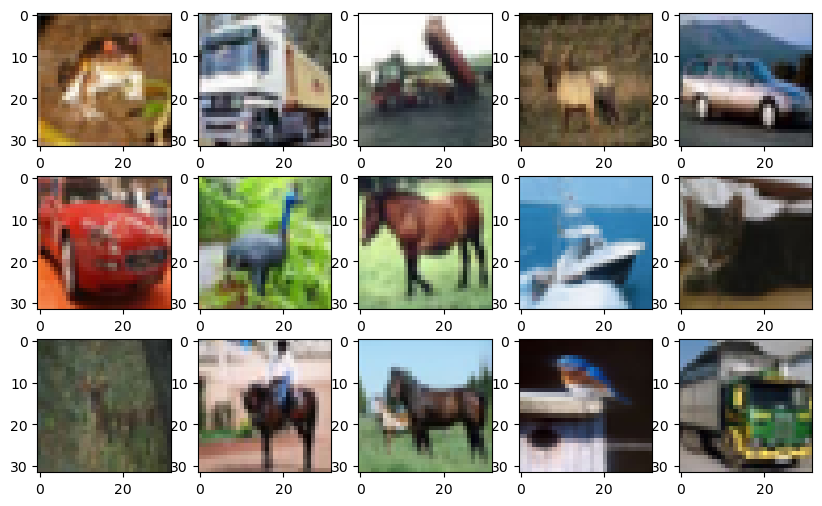

In [6]:
nrows, ncols = 3, 5  # 3 lignes, 5 colonnes
fig, axes = plt.subplots(nrows, ncols, figsize=(10, 6))
for i in range(nrows):
    for j in range(ncols):
        index = i * ncols + j  # pour parcourir les images
        axes[i, j].imshow(x_train[index])  # afficher l'image
plt.show()
#cmap permet de définir la palette de couleurs

## 3. 🧼 Prétraitement des images
Nous allons appliquer les techniques suivantes :
- Normalisation
- Filtrage (débruitage)
- Augmentation de données
- Conversion en niveaux de gris (optionnel)

1. normaliser les images entre 0 et 1

In [ ]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
print("Après normalisation :", x_train.max())
image_originale = x_train[0]
plt.figure()
plt.imshow(image_filtree)
plt.show(

In [ ]:
image_originale = x_train[0]
plt.figure()
plt.imshow(image_filtree)
plt.show()

2. appliquer un filtre gaussian en utilisant la bibliothèque Open CV

cv2.GaussianBlur(src, ksize, sigmaX)
Paramètre	Description
src	        Image d'entrée (tableau NumPy)
ksize	    Taille du noyau (ex: (5, 5)) impair seulement
sigmaX	    Écart-type de la gaussienne dans la direction X (horizontal)


In [ ]:
image_originale = x_train[0]
image_filtree = cv2.GaussianBlur(image_originale)
plt.figure()
plt.imshow(image_filtree)
plt.title("Après filtre gaussien")
plt.show()

3. faite une augmentation de données en utilisant ImageDataGenerator
4. Afficher les images générées

ImageDataGenerator est une classe très utilisée en Deep Learning (Keras / TensorFlow) pour prétraiter et augmenter des images en temps réel pendant l’entraînement d’un modèle.

Syntaxe: from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,        # Normalisation des pixels [0,1]
    rotation_range=20,     # Rotation aléatoire en degrés
    width_shift_range=0.1, # Décalage horizontal aléatoire
    height_shift_range=0.1,# Décalage vertical aléatoire
    shear_range=0.1,       # Cisaillement aléatoire
    zoom_range=0.1,        # Zoom aléatoire
    horizontal_flip=True,  # Flip horizontal
    fill_mode='nearest'    # Remplissage des pixels vides après transformation
)

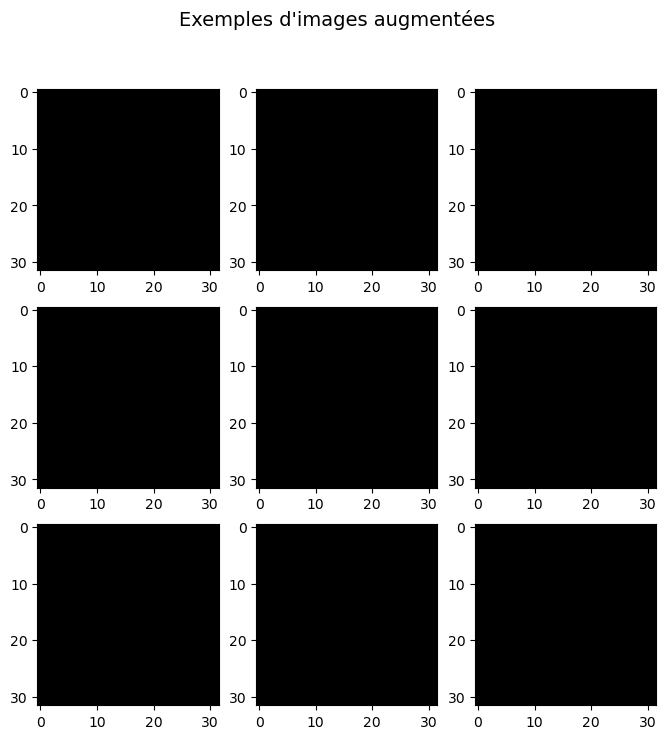

In [12]:
datagen = ImageDataGenerator(
    rescale=1./255,          # Normalisation entre 0 et 1
    rotation_range=20,       # Rotation aléatoire ±20°
    width_shift_range=0.1,   # Décalage horizontal ±10%
    height_shift_range=0.1,  # Décalage vertical ±10%
    shear_range=0.1,         # Cisaillement (shear)
    zoom_range=0.1,          # Zoom ±10%
    horizontal_flip=True,    # Miroir horizontal
    fill_mode='nearest'      # Remplissage des bords vides
)
# Prendre une seule image 
image = x_train[0]
image = image.reshape((1,) + image.shape)  # reshape pour convenir à ImageDataGenerator

# Créer un itérateur à partir de l’image
it = datagen.flow(image, batch_size=1)
plt.figure(figsize=(8, 8))
for i in range(9):
    batch = next(it)  
    img = batch[0]
    plt.subplot(3, 3, i + 1)
    plt.imshow(img)

plt.suptitle("Exemples d'images augmentées", fontsize=14)
plt.show()

## 4. 🧠 Modèle CNN simple pour évaluer l'impact
On va maintenant entraîner un petit modèle CNN pour voir l'effet du prétraitement.

In [ ]:
# 📐 Préparation des labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [ ]:
# 🔧 Définition du modèle
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

In [ ]:
# 🚀 Entraînement du modèle sur images normalisées
history = model.fit(x_train_norm, y_train_cat, epochs=5, validation_data=(x_test_norm, y_test_cat))

## 5. 📊 Évaluation des performances

In [ ]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Évolution de l'accuracy")
plt.xlabel("Épochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## 6. ✅ Conclusion
- Le prétraitement a permis d'améliorer la qualité des images.
- L'augmentation de données réduit le surapprentissage.
- L'étape de normalisation est essentielle.

👉 Tu peux maintenant tester d'autres techniques ou d'autres jeux de données !